<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/learning_without_teacher/Lab1_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризації банківських рахунків. [Опис даних](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних
* Проведіть кластеризацію за допомогою DBSCAN


In [9]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/CC%20GENERAL.csv')
df = df.drop(columns=['CUST_ID'])

In [10]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

df_filled = imputer.fit_transform(df)

scaler = MinMaxScaler()
scaler.set_output(transform='pandas')

data = scaler.fit_transform(df_filled)

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [32]:
kmeans.inertia_

2927.6038824286707

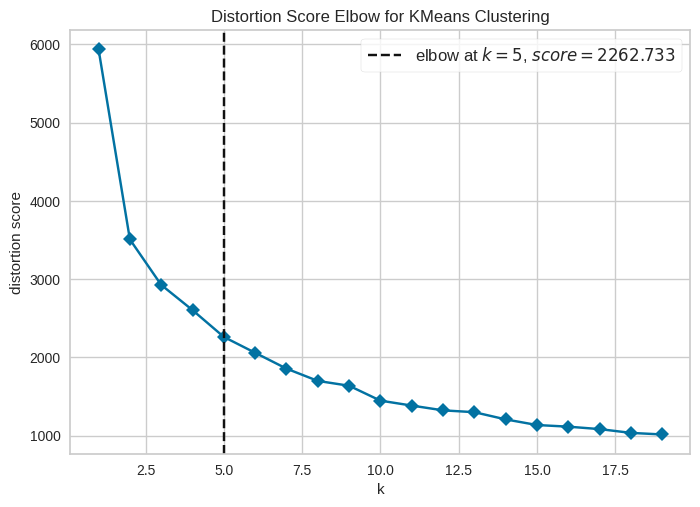

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 20),
                              timings=False,
                              metric='distortion',
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


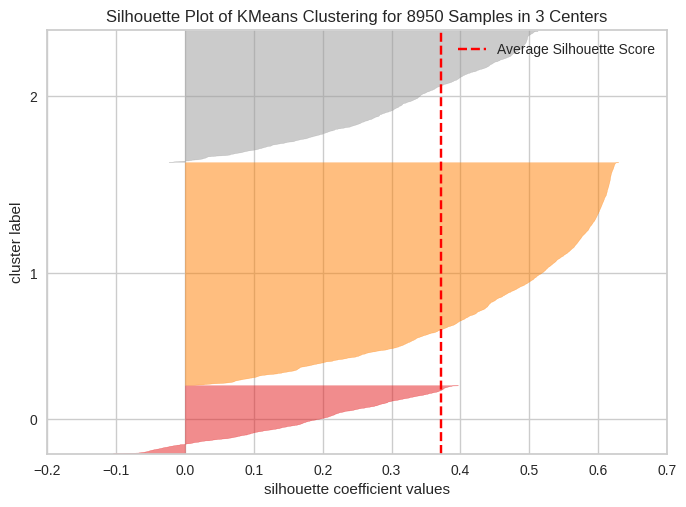

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(3))
visualizer.fit(data)
visualizer.show()

In [39]:
kmeans = KMeans(3)

kmeans.fit(data)

df['cluster_id'] = kmeans.labels_

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [40]:
df['cluster_id'].value_counts()

,count
cluster_id,
0,4724
1,2783
2,1443


In [41]:
results = df.groupby(by='cluster_id').mean()

results

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_id,,,,,,,,,,,,,,,,,
0,1704.937983,0.826253,295.709807,232.917762,62.981154,1357.001215,0.143189,0.081525,0.060560,0.185808,4.421888,2.675487,4141.606580,1476.550375,850.936156,0.068335,11.446867
1,1139.155805,0.913869,1066.464398,268.939483,798.169285,502.912011,0.870860,0.098692,0.819835,0.070712,1.730507,20.819260,3950.134021,1392.029613,932.265601,0.237883,11.515271
2,1924.914811,0.973706,3197.352536,2393.314193,804.038344,658.917943,0.893007,0.798486,0.480963,0.093550,2.336798,42.324324,6699.097209,3231.043031,776.414671,0.270895,11.751906


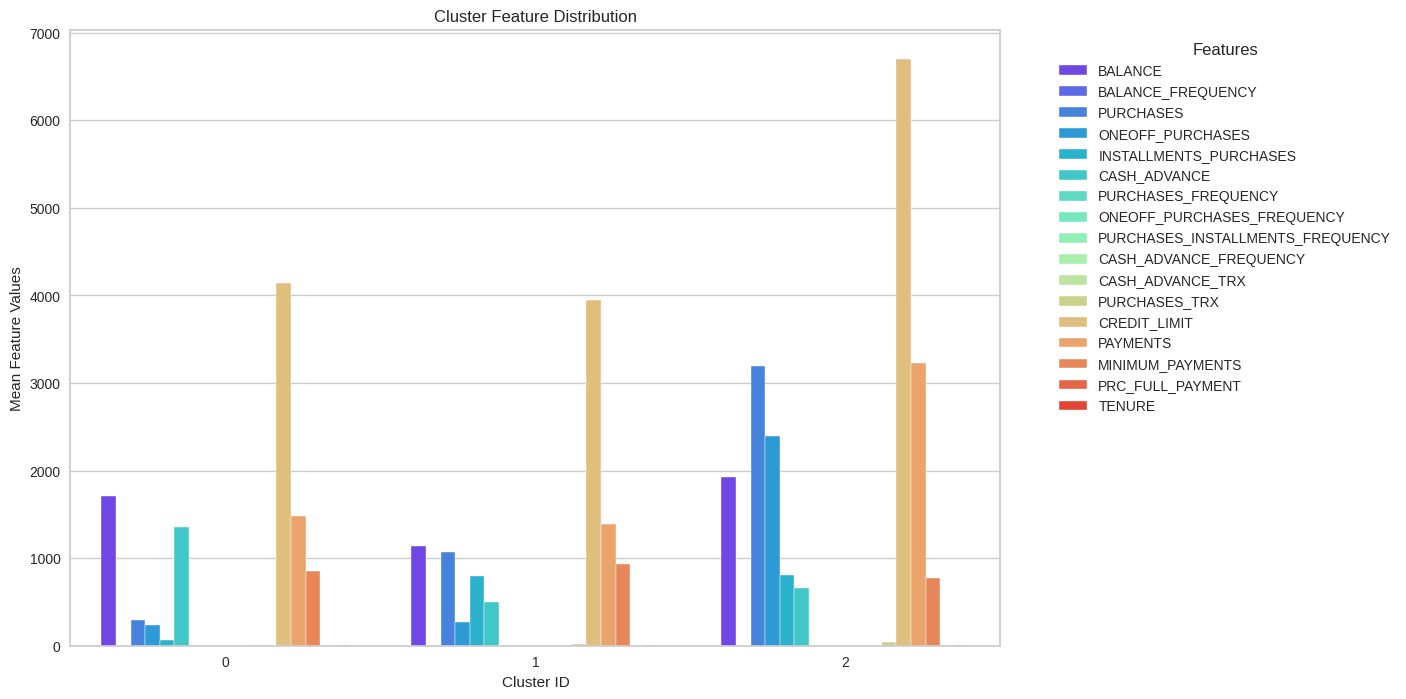

In [44]:
import seaborn as sns

color = sns.color_palette("rainbow", results.shape[1])

results_melted = results.reset_index().melt(id_vars='cluster_id', var_name='Features', value_name='Values')

plt.figure(figsize=(12, 8))
sns.barplot(x='cluster_id', y='Values', hue='Features', data=results_melted, palette=color)

plt.title('Cluster Feature Distribution')
plt.xlabel('Cluster ID')
plt.ylabel('Mean Feature Values')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

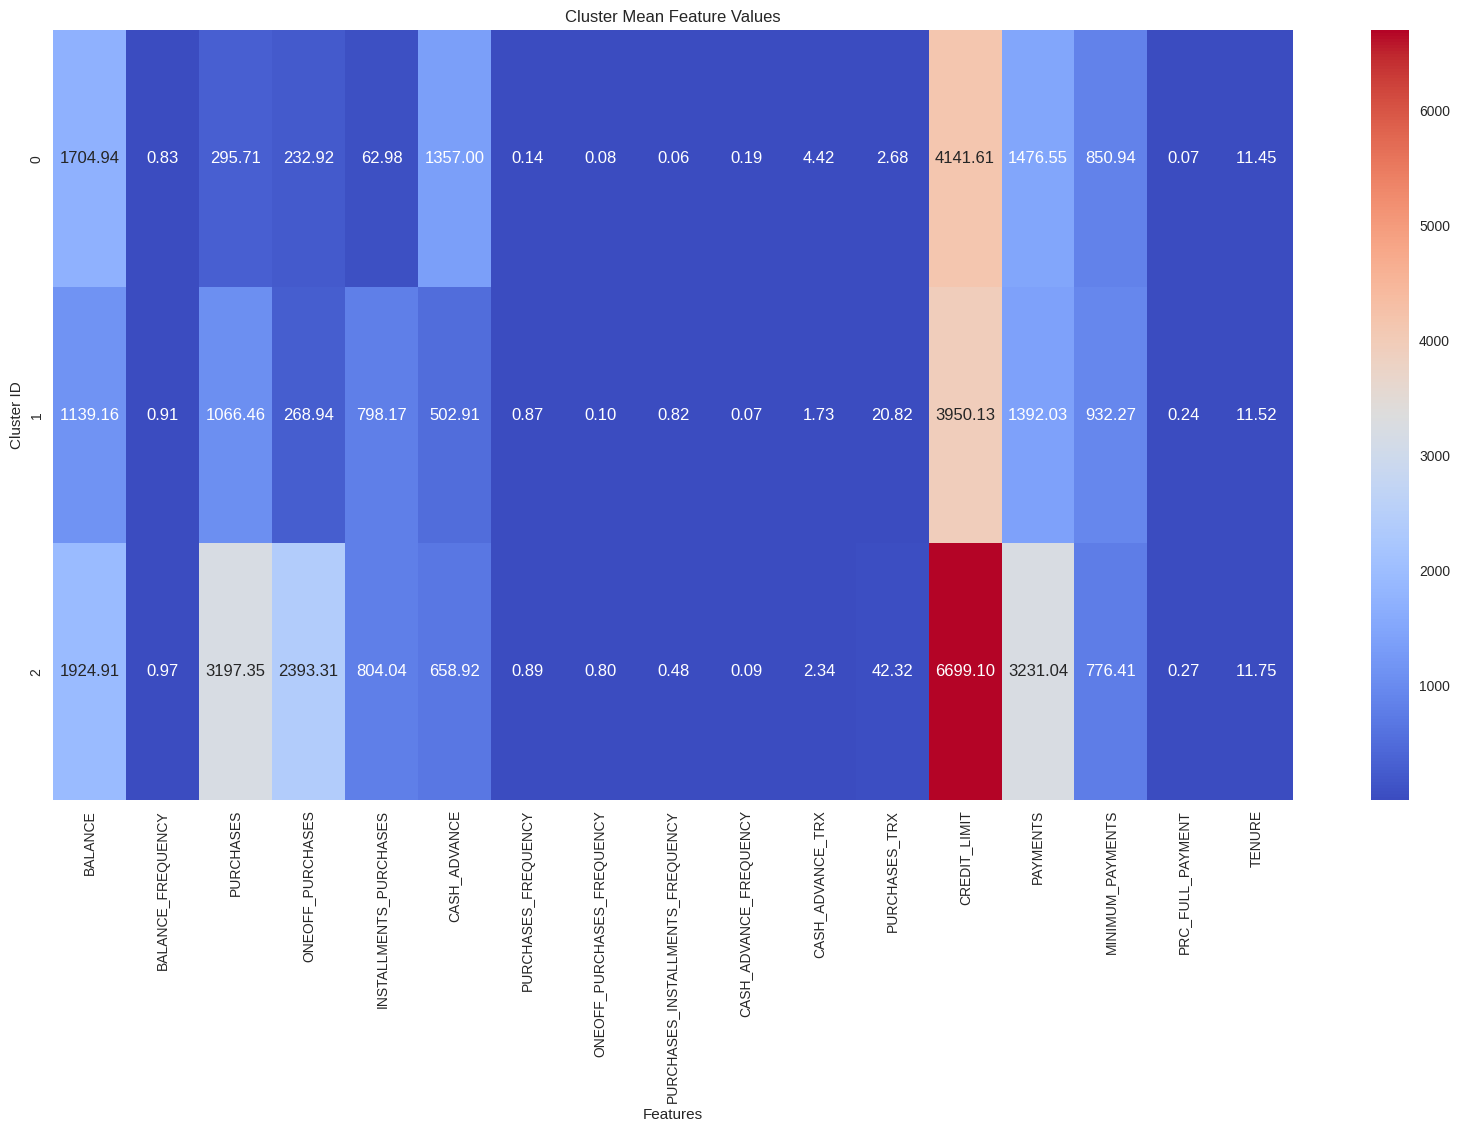

Cluster 0 Description:
CREDIT_LIMIT                        4141.606580
BALANCE                             1704.937983
PAYMENTS                            1476.550375
CASH_ADVANCE                        1357.001215
MINIMUM_PAYMENTS                     850.936156
PURCHASES                            295.709807
ONEOFF_PURCHASES                     232.917762
INSTALLMENTS_PURCHASES                62.981154
TENURE                                11.446867
CASH_ADVANCE_TRX                       4.421888
PURCHASES_TRX                          2.675487
BALANCE_FREQUENCY                      0.826253
CASH_ADVANCE_FREQUENCY                 0.185808
PURCHASES_FREQUENCY                    0.143189
ONEOFF_PURCHASES_FREQUENCY             0.081525
PRC_FULL_PAYMENT                       0.068335
PURCHASES_INSTALLMENTS_FREQUENCY       0.060560
Name: 0, dtype: float64


Cluster 1 Description:
CREDIT_LIMIT                        3950.134021
PAYMENTS                            1392.029613
BALANCE         

In [47]:
cluster_means = df.groupby('cluster_id').mean()

plt.figure(figsize=(20, 10))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Cluster Mean Feature Values')
plt.xlabel('Features')
plt.ylabel('Cluster ID')
plt.show()

for cluster_id in cluster_means.index:
    print(f"Cluster {cluster_id} Description:")
    cluster_description = cluster_means.loc[cluster_id].sort_values(ascending=False)
    print(cluster_description)
    print("\n")